In [2]:
import numpy as np 
import pandas as pd 
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as snsa
from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv('302.csv')
df.describe(include='all')

,Satisfaction,Loyalty
count,30.000000,30.000000
mean,6.400000,0.001000
std,2.620871,1.016476
min,1.000000,-1.690000
25%,4.250000,-0.967500
50%,7.000000,0.150000
75%,8.750000,0.947500
max,10.000000,1.380000


Text(0, 0.5, 'Loyalty')

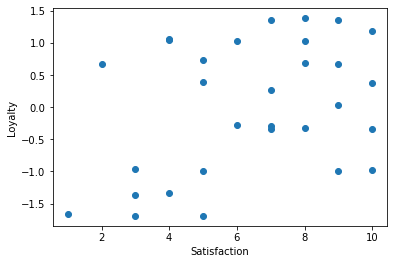

In [5]:
#Datei plotten
plt.scatter(df['Satisfaction'], df['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [9]:
#Armbeugenmethode
x = df[['Satisfaction', 'Loyalty']]

Text(0, 0.5, 'Loyalty')

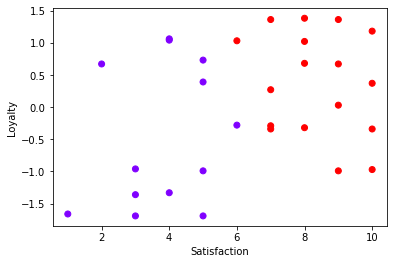

In [8]:
#KMeans
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(x)
df['cluster'] = clusters

#Cluster plotten
plt.scatter(df['Satisfaction'], df['Loyalty'], c=df['cluster'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

diese Ergebnis zeigt, dass Kmeans den Cluster basierend auf die Zufridenheit zuweist, weil Zufriedenheit viel größer als Loyalität ist, daher brauchen wir Standardisierung.

preprocessing von sklearn standardisiert Variabeln getrennt.

In [11]:
#standardisieren
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)


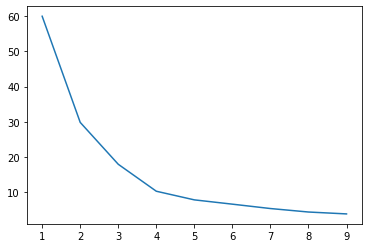

In [12]:
#Armbeugenmeth
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)


in diesem Fall sollten wir die Cluster plotten und die aussagkräftigste Anzahl zwischen 2 -5 wählen

Text(0, 0.5, 'Loyalty')

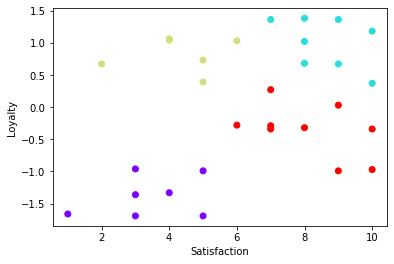

In [15]:
#KMeans
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(x_scaled)
df['cluster'] = clusters

#Cluster plotten
plt.scatter(df['Satisfaction'], df['Loyalty'], c=df['cluster'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

plotten mit vor-Standardisierung Datei hilf uns die Werte zu erkennen